In [1]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import celluloid as cell  #animations
import os

%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

path=os.getcwd()



def fourierT(f):

    return np.fft.fftshift(np.fft.ifft(np.fft.fftshift(f)))


def fourierI(f):

    return np.fft.fftshift(np.fft.fft(np.fft.fftshift(f)))

# Numerical study of noise evolution for ultrashort pulses generation using graphene as saturable absorber


Grafeno Absorbedor saturable: Se vuelve transparte a luz muy intensa. En ese momento la ganancia es más grande que la perdida, generando una ventana de tiempo la cual permite generar un pulso. Se modela como un 'fast saturable absorber'

Erbiu: medio de ganancia.

Text(0, 0.5, '$Power$ $/W$')

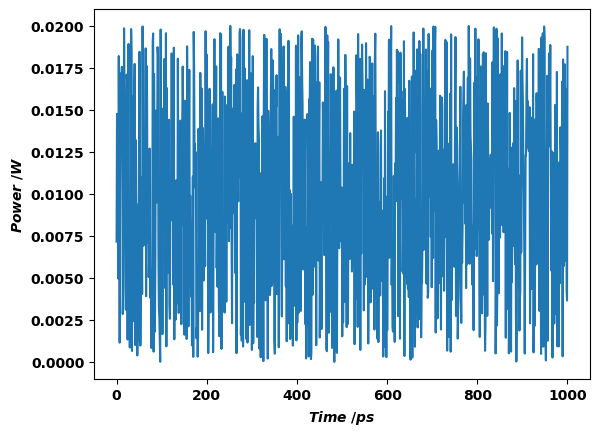

In [2]:
def q(A, q0, tau, Ea):

    return q0/(1+np.abs(A)**2*tau/Ea)


def g(A, T, g0, Ps):

    return g0/(1+np.trapz(np.abs(A)**2, T)/(1000*1e-12*Ps))


q0 = 0.03

taua = 100e-15

Ea = 770e-9

n = 2**10

omegag = 3.75*1e12  # THz

gamma = 4.3e-3  # nonlinear coefficient [1/W/m]

Ps = 0.538e-3

g0 = 3.5

c = 299792458  # speed of light

L = 10  # Longitud fibra

alp_db = 34

alpha = alp_db*np.log(10)/10  # attenuation coefficient

D = 57.0*1e-12*1e9*1e-3  # ps/nm/km

wl = 1550e-9  # Lambda

beta2 = -wl**2/(2*np.pi*c)*D

t = np.linspace(0, 1000, n)*1e-12

dt = 1000*1e-12/len(t)

A = np.random.uniform(low=0.0, high=0.02, size=n)

plt.plot(t*1e12, A)
plt.xlabel('$Time$ $/ps$')
plt.ylabel('$Power$ $/W$')

In [3]:
def fourier_split1(psi0, T, gamma, beta2, deltat, lenght):

    N = len(psi0)

    dz = 0.1

    dw = np.pi/(N*deltat)

    V = np.array([j*dw for j in range(-int(N/2), int(N/2))])

    psi = psi0

    zz = 0

    while zz <= lenght:

        D = -alpha/2+1j*V**2*beta2/2+g(psi, T, g0, Ps)*(1-V**2/omegag**2)

        UD = np.exp(dz*D*0.5, dtype=complex)

        step1 = fourierI(UD*fourierT(psi))

        N = 1j*np.abs(psi)**2*gamma-q(psi, q0, taua, Ea)

        UN = np.exp(dz*N, dtype=complex)

        step2 = UN*step1

        step3 = fourierI(UD*fourierT(step2))

        psi = step3

        zz += dz

    return psi

In [101]:
N = 120
k = fourier_split1(A, t, gamma, beta2, dt, L*N)

Text(0.5, 0, '$Time$ $/ps$')

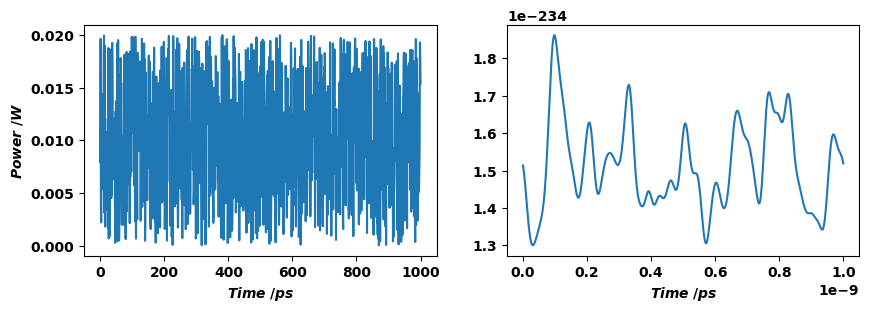

In [175]:
f = plt.figure(figsize=(10, 3))


plt.subplot(121)

plt.plot(t*1e12, A)
plt.xlabel('$Time$ $/ps$')
plt.ylabel('$Power$ $/W$')


plt.subplot(122)
plt.plot(t, k)
plt.xlabel('$Time$ $/ps$')

# Synchronised dual-wavelength mode-locking in waveguide lasers

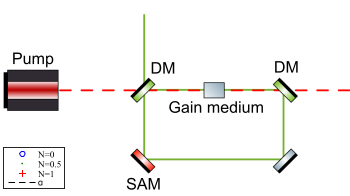

Text(0, 0.5, '$g_0$')

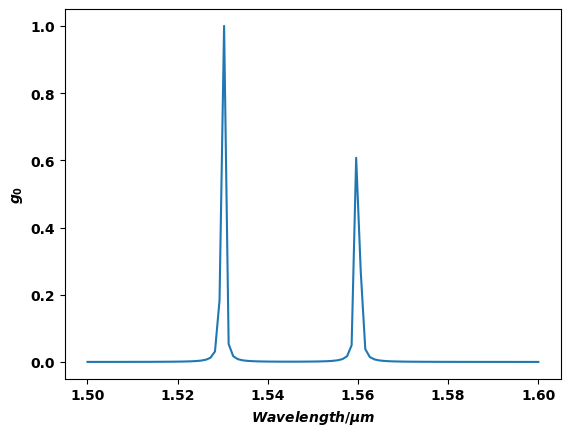

In [20]:
E_sat = 50*1e-12
Omega = 15e12
c = 299792458
lambda1 = 1530e-9
lambda2 = 1560e-9
omega1 = (2*np.pi*c)/lambda1
omega2 = (2*np.pi*c)/lambda2
wl = np.linspace(1.5e-6, 1.6e-6, 100)
omega = (2*np.pi*c)/wl
N = [0, 0.5, 1]


def g0(omega, N1,N2):

    return (1/(1+((omega-omega1))**2)+(1)/(1+((omega-omega2))**2))

y=g0(omega, 1,2)

plt.plot(wl*1e6, y/max(y))

plt.xlabel('$Wavelength/\mu m$')
plt.ylabel('$g_0$')

# A Fast Method for Nonlinear Schrödinger Equation.

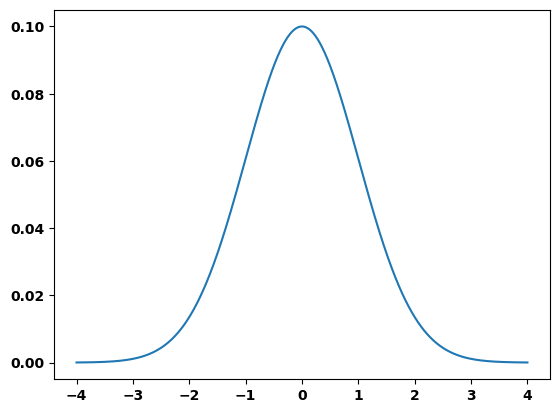

In [26]:
alpha = 0.17*np.log(10)/10
beta2 = -2.549*(1e-12)**2*1e-3
beta3 = 0
gamma = 2.4*1e-3
Tr = 0
L = 80*1e3
P0 = 10*1e-3
T0 = 50*1e-12
N = 2**10
L=80e3
T = np.linspace(-200, 200, N)*1e-12
u0 = np.sqrt(P0)*np.exp(-T**2/(2*T0**2))
plt.plot(T/T0, u0)

# Para comparar con el método propuesto de este articulo implemento un codigo de otro articulo:

# Robust split-step Fourier methods for simulating the propagation of ultra-short pulses in sigle and two-mode...

In [123]:
def fourier_split(psi0, gamma, beta2, beta3, Tr,w0, deltat, length,steps):

    N = len(psi0)

    dz = length/steps

    dw = np.pi/(N*deltat)

    V = np.array([j*dw for j in range(-int(N/2), int(N/2))])

    psi = psi0

    D = -alpha/2+1j*V**2*beta2/2+1j*beta3/6*V**3

    UD = np.exp(dz*L*0.5, dtype=complex)

    S=1/w0

    for i in range(steps):


        A_ast = fourierI(UD*fourierT(psi))                    

        N = 1j*gamma*(np.abs(A_ast)**2)
            #+1j*S*np.conjugate(A_ast)*fourierI(-1j*V*fourierT(A_ast))
            #+(1j*S-Tr)*fourierI(-1j*V*fourierT(np.abs(A_ast)**2)))

        A_aast= A_ast+dz*N*A_ast

        step3 = fourierI(UD*fourierT(A_aast))
        
        psi = step3

    return psi

In [125]:
N = 2**12
T = np.linspace(-200, 200, N)*1e-12
beta3=1.6666666666666665e-40
Tr=3e-15
T0=5e-12
beta2=0
alpha=0.02*np.log(10)/10
deltat=400/N*1e-12
c = 299792458  # speed of light
WL=1550e-9
w0=(2*np.pi*c/(WL))  #Frequencies.
length=T0**3/(beta3)*6
P0 = 10*1e-3
gamma = 2.4*1e-3
T = np.linspace(-200, 200, N)*1e-12
deltat=400e-12/len(T)
u0 = np.sqrt(P0)*np.exp(-T**2/(2*T0**2))
sol=fourier_split(u0, gamma, beta2, beta3, Tr,w0, deltat, length,1000)


/tmp/ipykernel_9095/1964911321.py:15: RuntimeWarning: overflow encountered in exp
  UD = np.exp(dz*L*0.5, dtype=complex)
/tmp/ipykernel_9095/1964911321.py:22: RuntimeWarning: invalid value encountered in multiply
  A_ast = fourierI(UD*fourierT(psi))


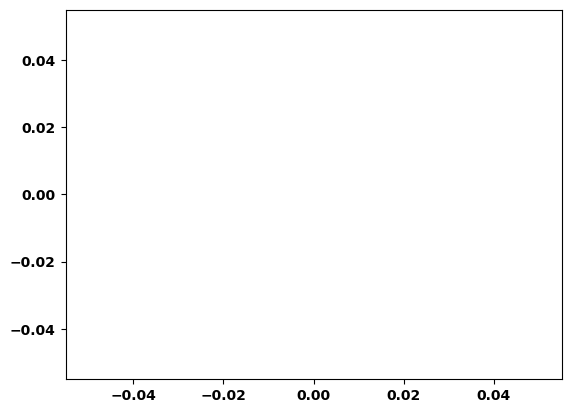

In [121]:
plt.plot(T,np.abs(sol)**2)

In [58]:
Ld

125000.0

In [45]:
pasos=np.arange(50,10000,50)
resul=[]
for j in pasos:
    sol2=fourier_split(u0, gamma, beta2, deltat,Ld*5,j)
    resul.append(np.trapz(np.abs(sol2-sol)**2,T)/np.trapz(np.abs(sol)**2,T))

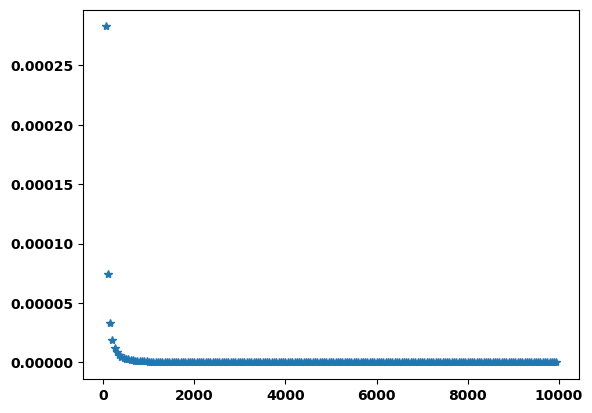

In [47]:
plt.plot(pasos,resul,'*')

In [146]:
def fourier_new(A0, L, w0, dt, stepsz, n):

   
    dz = L/stepsz
    N = len(A0)
    dw = np.pi/(N*dt)
    V = np.array([j*dw for j in range(-int(N/2), int(N/2))])
    Ai = A0
    w=1.

    Ai_s=[Ai]

    for i in range(1,n):

        Ai_s.insert(i,0)
   

    def L_op(A):

        L = -alpha/2+1j*V**2*beta2/2-1j*V**2*beta3/6

        UL = np.exp(dz*D*0.5, dtype=complex)

        return fourierI(UL*fourierT(A))

    As = np.array([[3/2, -1/2, 0, 0, 0], [23/12, -16/12, 5/12, 0, 0], [55/24, -
                  59/24, 37/24, -9/24, 0], [1901/720, -2774/720, 2616/720, -1274/720, 251/720]])
    Bs = np.array([[1/2, 1/2, 0, 0, 0], [5/12, 8/12, -1/12, 0, 0], [9/24,
                  19/24, -5/24, -1/24, 0], [251/720, 646/720, -264/720, 106/720, -19/720]])
    Cs= np.array([[1/4,2/4,1/4,0,0,0],[5/24,13/24,7/24,-1/24,0,0],[9/48,28/48,14/48,-4/48,1/48,0],[251/1440,897/1440,382/1440,-158/1440,87/1440,-19/1440]])

    def N(A):
        return 1j*gamma*(np.abs(A)**2+1j/(A*w0)*(fourierI(-1j*w*fourierT(np.abs(A)**2*A)))-Tr*fourierI(-1j*w*fourierT(np.abs(A)**2)))

    for j in range(0,stepsz):

        ubar_1 = L_op(A)
        ubar_2=np.exp(dz*(sum(As[n,j]*N(Ai_s[j]) for i in range(len(Ai_s)))))*ubar_1
        ubar_3=L_op(ubar_2)
        u_2=np.exp(dz*(As[n,0]*N()+sum(As[n,i]*N(i) for i in Ai_s)))*ubar_1


In [148]:
As = np.array([[3/2, -1/2, 0, 0, 0], [23/12, -16/12, 5/12, 0, 0], [55/24, -
              59/24, 37/24, -9/24, 0], [1901/720, -2774/720, 2616/720, -1274/720, 251/720]])
Bs = np.array([[1/2, 1/2, 0, 0, 0], [5/12, 8/12, -1/12, 0, 0], [9/24,
              19/24, -5/24, -1/24, 0], [251/720, 646/720, -264/720, 106/720, -19/720]])
Bs

array([[ 0.5       ,  0.5       ,  0.        ,  0.        ,  0.        ],
       [ 0.41666667,  0.66666667, -0.08333333,  0.        ,  0.        ],
       [ 0.375     ,  0.79166667, -0.20833333, -0.04166667,  0.        ],
       [ 0.34861111,  0.89722222, -0.36666667,  0.14722222, -0.02638889]])

In [16]:
a=[1]

a.insert(,5)

In [17]:
a

[1, 5]